In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('data_sales.xlsx')

df.head()

,Month,Year,SKU_ID,SKU_Name,Sales,Stores,Transactions,Salesman,Competitor_Sales,Temperature
0,1,2017,2023001,Wafer 1,1.298625e+07,24625.05,960240.00,0,0.000000,26.09
1,2,2017,2023001,Wafer 1,1.232177e+07,25927.35,979057.50,0,306335.491071,26.05
2,3,2017,2023001,Wafer 1,1.265861e+07,27470.40,1116885.00,0,312790.178571,26.00
3,4,2017,2023001,Wafer 1,1.234409e+07,27051.90,1014221.25,0,329385.535714,26.23
4,5,2017,2023001,Wafer 1,1.210306e+07,27035.10,1021713.75,0,325542.857143,26.20


In [3]:
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             186 non-null    int64         
 1   Year              186 non-null    int64         
 2   SKU_ID            186 non-null    int64         
 3   SKU_Name          186 non-null    object        
 4   Sales             186 non-null    float64       
 5   Stores            186 non-null    float64       
 6   Transactions      186 non-null    float64       
 7   Salesman          186 non-null    int64         
 8   Competitor_Sales  186 non-null    float64       
 9   Temperature       146 non-null    float64       
 10  Date              186 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 16.1+ KB


In [8]:
data.isna().any()

Month               False
Year                False
SKU_ID              False
SKU_Name            False
Sales               False
Stores              False
Transactions        False
Salesman            False
Competitor_Sales    False
Temperature          True
Date                False
dtype: bool

In [12]:
data.duplicated().any()

False

In [5]:
data['Date'] = pd.to_datetime(data['Month'].astype(str) +'-'+ data['Year'].astype(str))

C:\Users\putra\AppData\Local\Temp\ipykernel_17916\3103813291.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Month'].astype(str) +'-'+ data['Year'].astype(str))


In [13]:
data.describe()

,Month,Year,SKU_ID,Sales,Stores,Transactions,Salesman,Competitor_Sales,Temperature,Date
count,186.000000,186.00000,1.860000e+02,1.860000e+02,186.000000,1.860000e+02,186.000000,186.000000,146.000000,186
mean,6.483871,2019.83871,2.023002e+06,1.190111e+07,39242.958065,1.363650e+06,19.344086,328796.070709,26.266849,2020-04-17 17:17:25.161290240
min,1.000000,2017.00000,2.023001e+06,2.513203e+04,889.200000,2.235000e+04,0.000000,0.000000,25.510000,2017-01-01 00:00:00
25%,3.000000,2018.00000,2.023001e+06,8.868497e+06,28911.487500,9.790153e+05,18.000000,297224.497768,25.920000,2018-12-01 00:00:00
50%,6.500000,2020.00000,2.023002e+06,1.175635e+07,36067.800000,1.321646e+06,21.000000,338743.325893,26.190000,2020-06-16 00:00:00
75%,10.000000,2021.00000,2.023002e+06,1.447175e+07,51192.300000,1.755997e+06,24.750000,404789.363839,26.470000,2021-10-01 00:00:00
max,12.000000,2023.00000,2.023003e+06,2.765255e+07,64594.650000,2.414059e+06,38.000000,705910.178571,27.500000,2023-01-01 00:00:00
std,3.524778,1.71032,7.610276e-01,6.029564e+06,13600.889467,4.951776e+05,8.624283,158979.634852,0.475925,NaN


In [14]:
data[data['Transactions'] == data['Transactions'].max()]

,Month,Year,SKU_ID,SKU_Name,Sales,Stores,Transactions,Salesman,Competitor_Sales,Temperature,Date
58,11,2021,2023001,Wafer 1,2.350062e+07,63585.0,2414058.75,26,556996.741071,26.14,2021-11-01


In [15]:
data[data['Sales'] == data['Sales'].min()]

,Month,Year,SKU_ID,SKU_Name,Sales,Stores,Transactions,Salesman,Competitor_Sales,Temperature,Date
146,10,2019,2023003,Wafer 3,25132.033203,889.2,22350.0,21,2269.6875,NaN,2019-10-01


<Figure size 2000x1500 with 0 Axes>

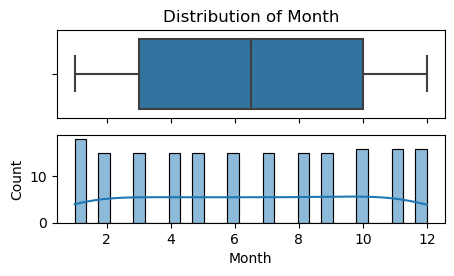

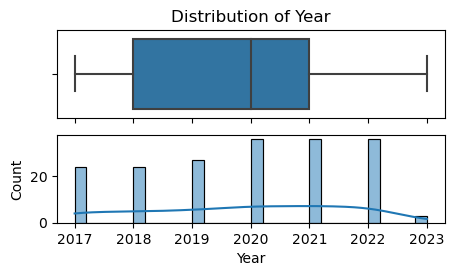

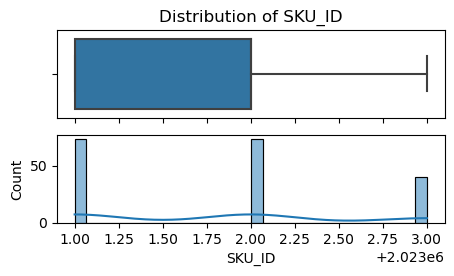

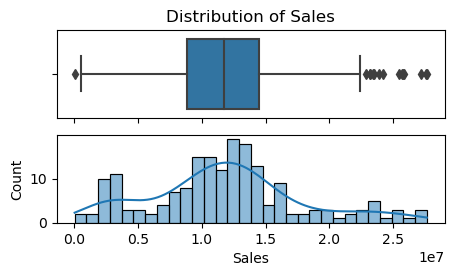

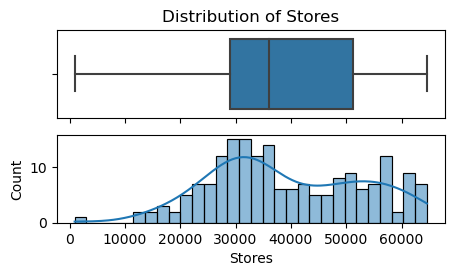

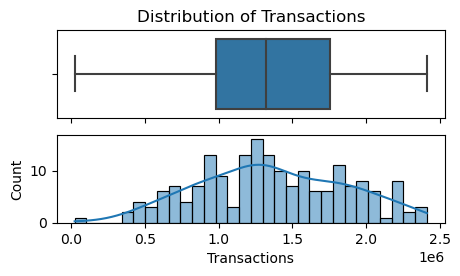

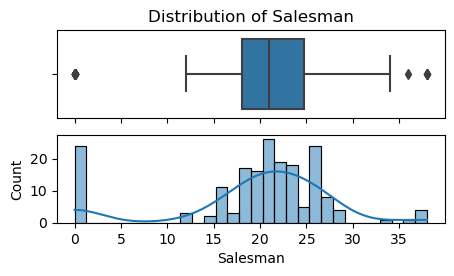

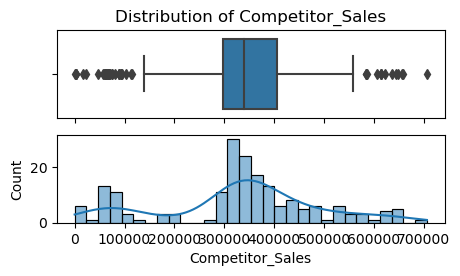

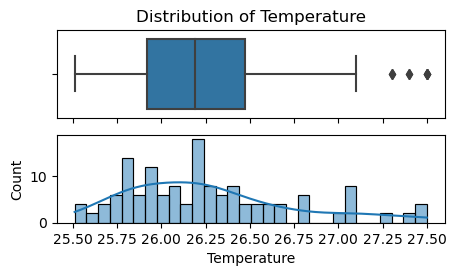

KeyError: 'Date'

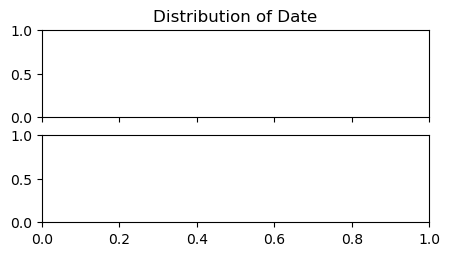

In [10]:
plt.figure(figsize=(20,15))

for i in data.describe().columns:
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (5,2.5))
    ax1.set_title(f"Distribution of {i}", color = "black")
    sns.boxplot(x = df[i], ax = ax1)
    ax1.set_xlabel ("")
    sns.histplot(data = df, x=i, ax = ax2, stat = "count", kde=True, bins=30)
    plt.show()

Text(0.5, 1.0, 'Korelasi Antara Setiap Variabel Numerik')

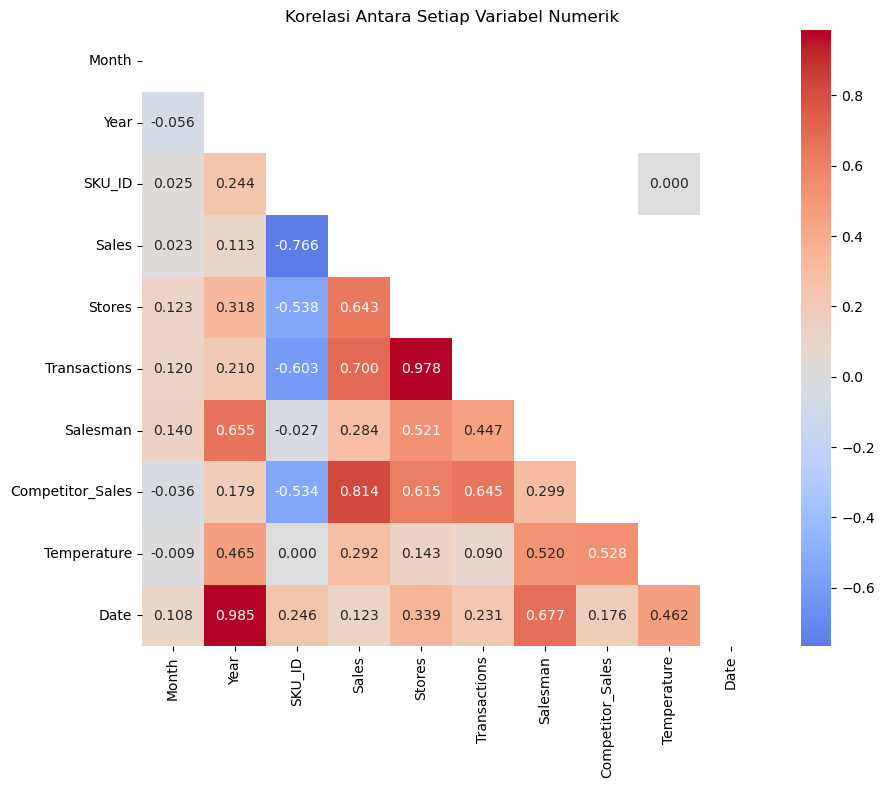

In [11]:
numerical_features = data.describe().columns

plt.figure(figsize=(10,8))

mask = np.triu(data[numerical_features].corr(method='spearman'))

sns.heatmap(data=data[numerical_features].corr(method='spearman'), annot=True, fmt='.3f', cmap='coolwarm', center=0, mask=mask)
plt.title('Korelasi Antara Setiap Variabel Numerik')

In [18]:
def ylabel(x, pos):
    return f'{x*1e-6:1.1f} Juta'

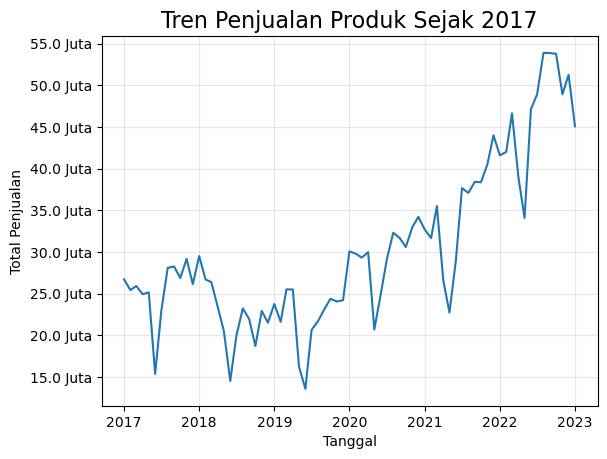

In [13]:
dat1 = data.groupby(['Date'], as_index=False)['Sales'].sum()

fig, ax = plt.subplots()
ax = sns.lineplot(dat1, x='Date', y='Sales')
ax.set_title('Tren Penjualan Produk Sejak 2017', fontsize=16)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.grid(visible=True, alpha=0.3)
plt.show()

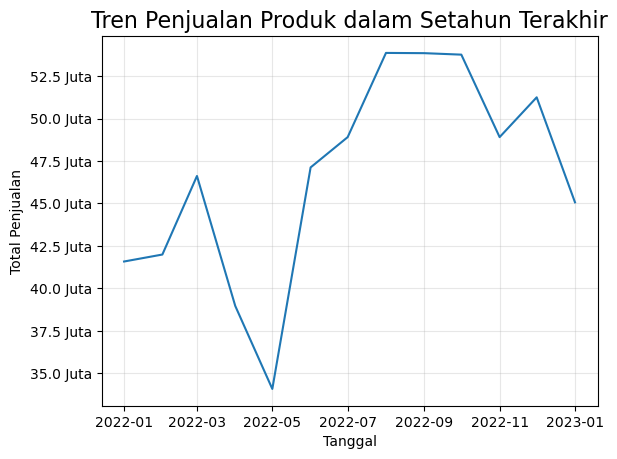

In [14]:
fig, ax = plt.subplots()
ax = sns.lineplot(dat1[dat1['Date'].dt.year > 2021], x='Date',y="Sales")
ax.set_title('Tren Penjualan Produk dalam Setahun Terakhir', fontsize=16)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.grid(visible=True, alpha=0.3)
plt.show()

In [72]:
dat1.tail(13)

,Date,Sales
60,2022-01-01,4.158226e+07
61,2022-02-01,4.199269e+07
62,2022-03-01,4.661997e+07
63,2022-04-01,3.896437e+07
64,2022-05-01,3.407577e+07
65,2022-06-01,4.712549e+07
66,2022-07-01,4.890981e+07
67,2022-08-01,5.387059e+07
68,2022-09-01,5.385634e+07
69,2022-10-01,5.376919e+07


In [79]:
dat1['Sales'].pct_change(periods=12)*100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
68    40.265454
69    40.194466
70    20.879008
71    16.534483
72     8.387473
Name: Sales, Length: 73, dtype: float64

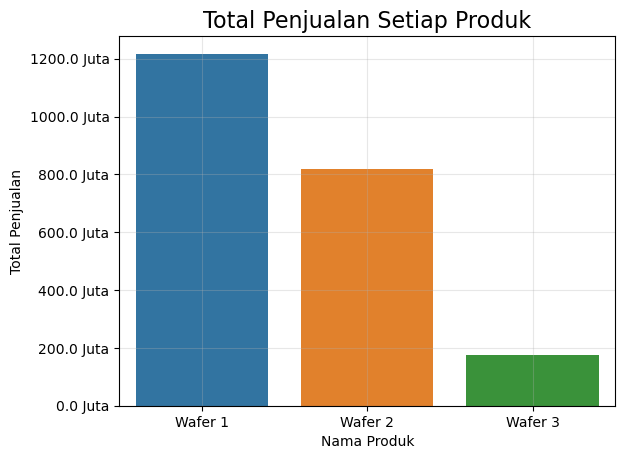

In [17]:
dat2 = data.groupby(['SKU_Name'], as_index=False)['Sales'].sum()

fig, ax = plt.subplots()
sns.barplot(dat2, x='SKU_Name', y='Sales')
ax.set_title('Total Penjualan Setiap Produk', fontsize=16)
ax.set_xlabel('Nama Produk')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.grid(visible=True, alpha=0.3)
plt.show()

In [70]:
dat9 = pd.pivot_table(data, values='Sales', index='Date',columns='SKU_Name', aggfunc='sum').reset_index()
dat9
# fig, axes = plt.subplots(3,1, figsize=(14,7))
# for i,j in zip(data['SKU_Name'].unique(), axes.flatten()): 
#     ax = sns.lineplot(dat9, x='Date', y=i, ax=j)
#     ax.set_xlabel('Tanggal')
#     ax.set_ylabel('Total Penjualan')
#     ax.yaxis.set_major_formatter(ylabel)
#     # ax.legend(title='Nama Produk')
#     ax.grid(visible=True, alpha=0.3)
# plt.show()

SKU_Name,Date,Wafer 1,Wafer 2,Wafer 3
0,2017-01-01,1.298625e+07,1.370828e+07,NaN
1,2017-02-01,1.232177e+07,1.308260e+07,NaN
2,2017-03-01,1.265861e+07,1.325120e+07,NaN
3,2017-04-01,1.234409e+07,1.257405e+07,NaN
4,2017-05-01,1.210306e+07,1.304462e+07,NaN
...,...,...,...,...
68,2022-09-01,2.765255e+07,1.652736e+07,9.676432e+06
69,2022-10-01,2.719193e+07,1.612320e+07,1.045406e+07
70,2022-11-01,2.315136e+07,1.490840e+07,1.085055e+07
71,2022-12-01,2.386507e+07,1.589511e+07,1.149472e+07


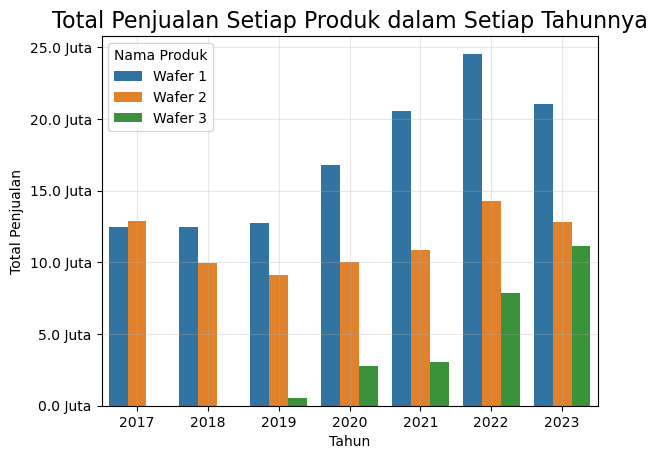

In [25]:
dat3 = data.groupby(['Year', 'SKU_Name'], as_index=False)['Sales'].mean()

fig, ax = plt.subplots()
sns.barplot(dat3, x="Year", y="Sales", hue="SKU_Name")
ax.set_title('Total Penjualan Setiap Produk dalam Setiap Tahunnya', fontsize=16)
ax.set_xlabel('Tahun')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.legend(title='Nama Produk', loc='upper left')
ax.grid(visible=True, alpha=0.3)
plt.show()

In [26]:
dat3

,Year,SKU_Name,Sales
0,2017,Wafer 1,1.249521e+07
1,2017,Wafer 2,1.290660e+07
2,2018,Wafer 1,1.243999e+07
3,2018,Wafer 2,9.991936e+06
4,2019,Wafer 1,1.278219e+07
5,2019,Wafer 2,9.086254e+06
6,2019,Wafer 3,5.723303e+05
7,2020,Wafer 1,1.682892e+07
8,2020,Wafer 2,1.005103e+07
9,2020,Wafer 3,2.745374e+06


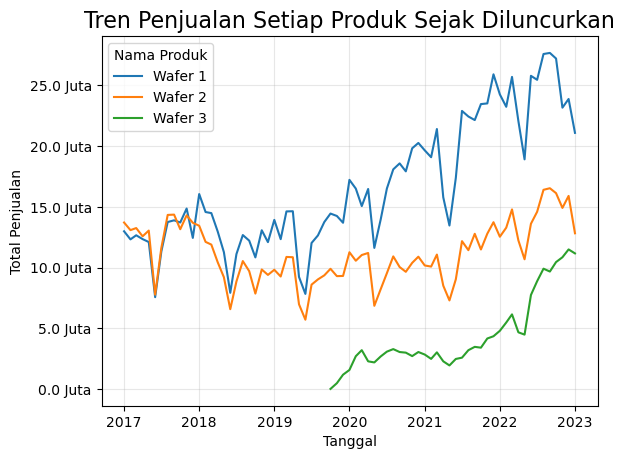

In [19]:
dat4 = data.groupby(['Date', 'SKU_Name'], as_index=False)['Sales'].sum()

fig, ax = plt.subplots()
ax = sns.lineplot(dat4, x='Date', y='Sales', hue='SKU_Name')
ax.set_title('Tren Penjualan Setiap Produk Sejak Diluncurkan', fontsize=16)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.legend(title='Nama Produk')
ax.grid(visible=True, alpha=0.3)
plt.show()

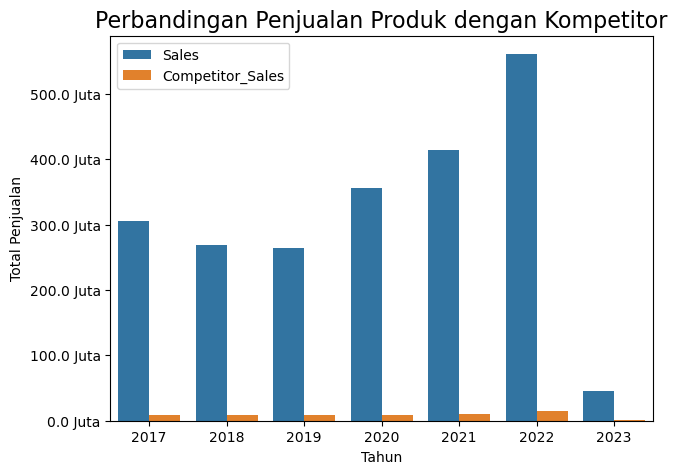

In [20]:
dat5 =  data.groupby(['Year'], as_index=False)[['Sales','Competitor_Sales']].sum()

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(dat5.melt(['Year']), x='Year', y='value', hue='variable')
ax.set_title('Perbandingan Penjualan Produk dengan Kompetitor', fontsize=16)
ax.set_xlabel('Tahun')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.legend(title=False)
plt.show()

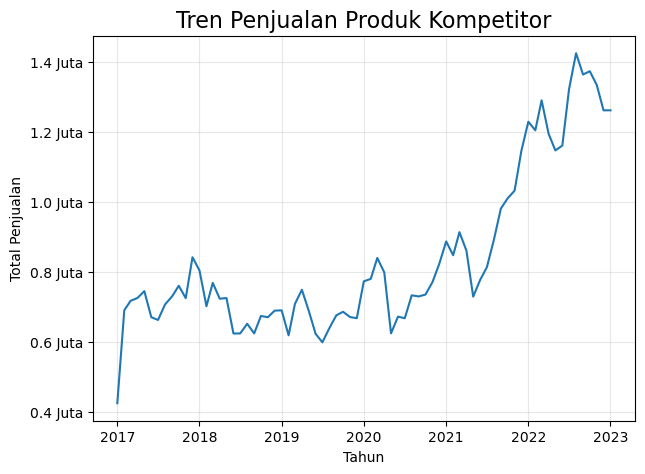

In [44]:
dat6 =  data.groupby(['Date'], as_index=False)['Competitor_Sales'].sum()

fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(dat6, x='Date', y='Competitor_Sales')
ax.set_title('Tren Penjualan Produk Kompetitor', fontsize=16)
ax.set_xlabel('Tahun')
ax.set_ylabel('Total Penjualan')
ax.yaxis.set_major_formatter(ylabel)
ax.grid(visible=True, alpha=0.3)
plt.show()

In [22]:
dat6['Competitor_Sales'].pct_change(periods=len(dat1)-1)*10

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
68         NaN
69         NaN
70         NaN
71         NaN
72    19.65973
Name: Competitor_Sales, Length: 73, dtype: float64

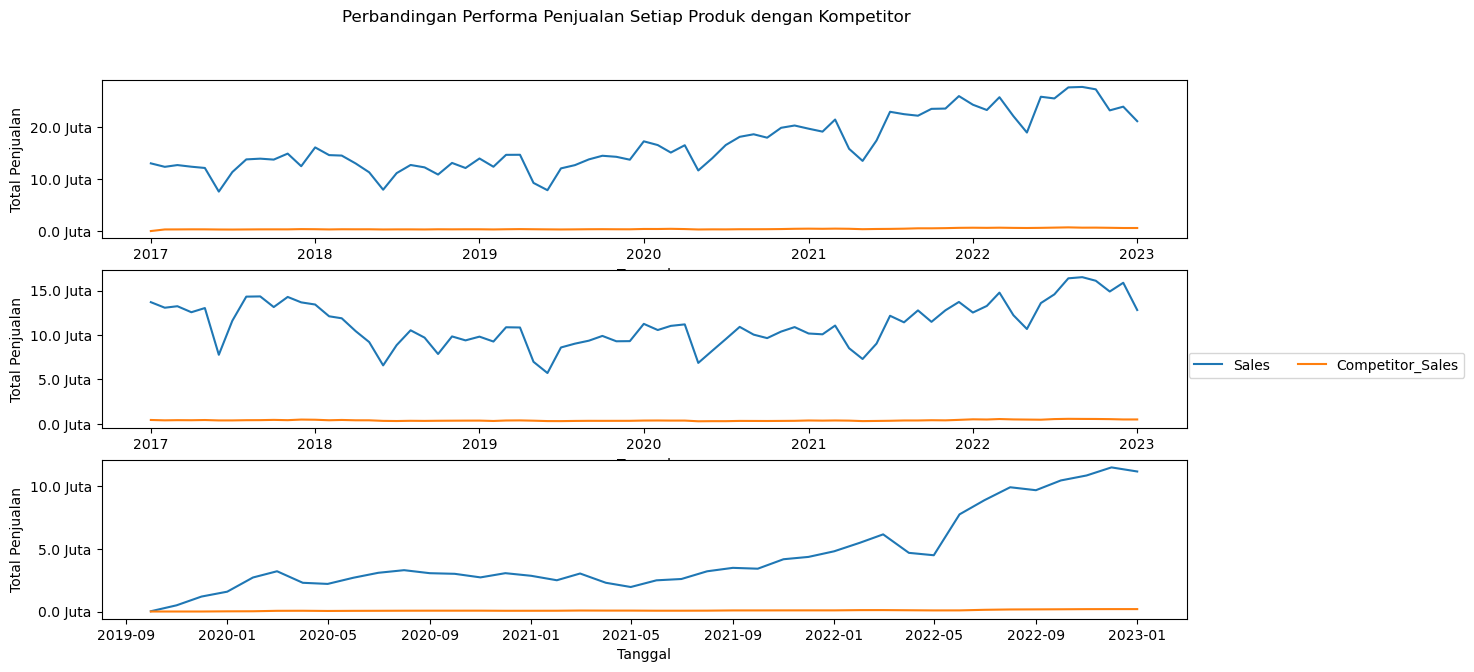

In [34]:
dat7 = data.groupby(['Date','SKU_Name'], as_index=False)[['Sales','Competitor_Sales']].sum()

fig, axes = plt.subplots(3,1, figsize=(14,7))
for i, j in zip(dat7['SKU_Name'].unique(), axes.flatten()):
    ax = sns.lineplot(dat7[dat7['SKU_Name'] == i].melt(['Date','SKU_Name']), x='Date', y='value', hue='variable', ax=j)
    ax.set_xlabel('Tanggal')
    ax.set_ylabel('Total Penjualan')
    ax.yaxis.set_major_formatter(ylabel)
    ax.get_legend().remove()
plt.suptitle('Perbandingan Performa Penjualan Setiap Produk dengan Kompetitor')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(, 0.5))
plt.show()

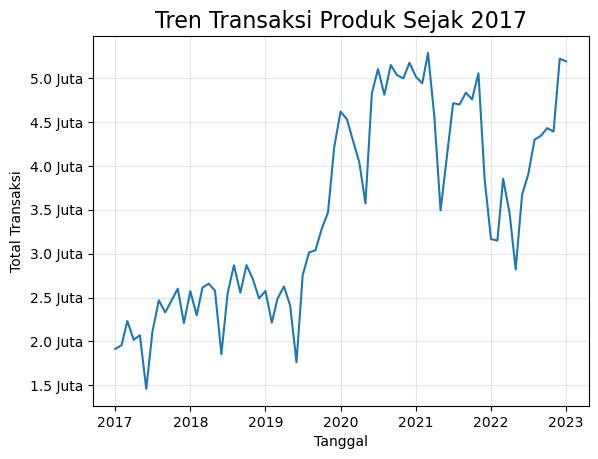

In [43]:
dat8 = data.groupby(['Date'], as_index=False)['Transactions'].sum()

fig, ax = plt.subplots()
ax = sns.lineplot(dat8, x='Date', y='Transactions')
ax.set_title('Tren Transaksi Produk Sejak 2017', fontsize=16)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Transaksi')
ax.yaxis.set_major_formatter(ylabel)
ax.grid(visible=True, alpha=0.3)
plt.show()

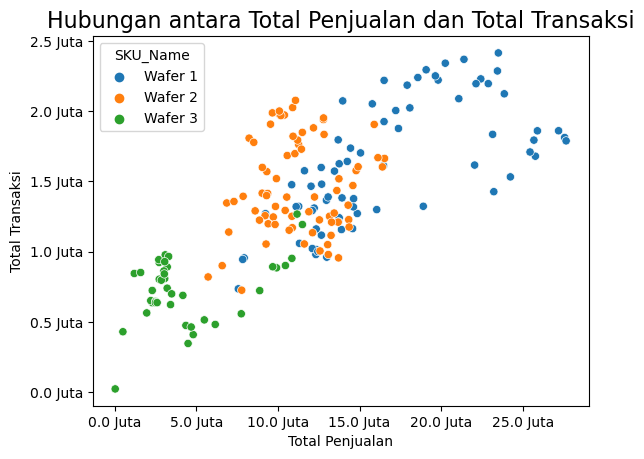

In [41]:
fig, ax =plt.subplots()
ax.set_title('Hubungan antara Total Penjualan dan Total Transaksi', fontsize=16)
ax = sns.scatterplot(data, x='Sales', y='Transactions', hue='SKU_Name')
ax.set_ylabel('Total Transaksi')
ax.set_xlabel('Total Penjualan')
ax.xaxis.set_major_formatter(ylabel)
ax.yaxis.set_major_formatter(ylabel)
plt.show()